## 1) Problem Statement:
"Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

We need to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
import plotly.express as px 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("M:\ML_Practice\Statistics Distribution\Travel.csv")

In [3]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


### From this dataset, we have to find that the new program 'Wellness Tourism Package' will success or not.

## Part 1: Data Cleaning

#### Handling Missing Values
1. Handling missing values
2. Handling duplicates
3. Check Dataset
4. Check datatype

In [4]:
# Checking missing values:
df.isnull

<bound method DataFrame.isnull of       CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0         200000          1  41.0     Self Enquiry         3              6.0   
1         200001          0  49.0  Company Invited         1             14.0   
2         200002          1  37.0     Self Enquiry         1              8.0   
3         200003          0  33.0  Company Invited         1              9.0   
4         200004          0   NaN     Self Enquiry         1              8.0   
...          ...        ...   ...              ...       ...              ...   
4883      204883          1  49.0     Self Enquiry         3              9.0   
4884      204884          1  28.0  Company Invited         1             31.0   
4885      204885          1  52.0     Self Enquiry         3             17.0   
4886      204886          1  19.0     Self Enquiry         3             16.0   
4887      204887          1  36.0     Self Enquiry         1             14

In [5]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [6]:
df['Designation'].value_counts()

Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64

In [7]:
df['Passport'].value_counts()

Passport
0    3466
1    1422
Name: count, dtype: int64

In [8]:
df['Occupation'].value_counts()

Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64

In [9]:
df['CityTier'].value_counts()

CityTier
1    3190
3    1500
2     198
Name: count, dtype: int64

In [10]:
df['DurationOfPitch'].value_counts()

DurationOfPitch
9.0      483
7.0      342
8.0      333
6.0      307
16.0     274
15.0     269
14.0     253
10.0     244
13.0     223
11.0     205
12.0     195
17.0     172
30.0      95
22.0      89
31.0      83
23.0      79
18.0      75
29.0      74
32.0      74
25.0      73
21.0      73
27.0      72
26.0      72
24.0      70
35.0      66
20.0      65
28.0      61
33.0      57
19.0      57
34.0      50
36.0      44
5.0        6
126.0      1
127.0      1
Name: count, dtype: int64

In [11]:
# Check all the categories
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [12]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [13]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [14]:
df['Gender']=df['Gender'].replace('Fe Male', 'Female')

In [15]:
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [16]:
df['MaritalStatus'] = df['MaritalStatus'].replace('Single','Unmarried')

In [17]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [18]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [19]:
# Check missing values in percentage of total number of datas in that categories
# These are the features with NaN values

feature_with_nan = [features for features in df.columns if df[features].isnull().sum()>=1]
for feature in feature_with_nan:
    print(feature, np.round(df[feature].isnull().mean()*100,5), '% missing values' )

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [20]:
# Statistics on numerical columns(Null Columns)
df[feature_with_nan].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


### Imputing Null Values
1. Impute Meadian values for Age Columns
2. Impute Mode for TypeofContact
3. Impute Median for DurationOfPitch
4. Impute Mode for NumberOfFollowups as it is Discrete feature 
5. Impute Mode for PreferredPropertyStar
6. Impute Median for NumberOfTrips
7. Impute Mode for NumberOfChildrenVisiting
8. Impute Median for MonthlyIncome

## Replace the Null values with the Median and Mode values

In [21]:
# Age
df.Age.fillna(df.Age.median(), inplace=True)

# TypeofContact
df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace=True)

# DurationOfPitch
df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace=True)

# NumberOfFollowups
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0], inplace=True)

# PreferredPropertyStar
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace=True)

# NumberOfTrips
df.NumberOfTrips.fillna(df.NumberOfTrips.median(), inplace=True)

# NumberOfChildrenVisiting
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0], inplace=True)

# MonthlyIncome
df.MonthlyIncome.fillna(df.MonthlyIncome.median(), inplace=True)

In [22]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [23]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

## From the above command we can see that we have replaced all Null values. There is no Null values. 

In [24]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000
mean,202443.500000,0.188216,37.547259,1.654255,15.362930,2.905074,3.711129,3.577946,3.229746,0.290917,3.078151,0.620295,1.184738,23559.179419
std,1411.188388,0.390925,9.104795,0.916583,8.316166,0.724891,0.998271,0.797005,1.822769,0.454232,1.365792,0.485363,0.852323,5257.862921
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20485.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,43.000000,3.000000,19.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25424.750000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [25]:
# This 'CustomerID' is not necessary, so. we will delete this column
df.drop('CustomerID', inplace=True, axis=1)

In [26]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Feature Engineering
#### Feature Extraction

In [27]:
# Create new column for feature
df['TotalVisiting'] = df['NumberOfPersonVisiting']+df['NumberOfChildrenVisiting']
df.drop(columns=['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], axis=1, inplace=True)

In [28]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [29]:
# Get all the numeric features
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Number of numerical feature:', len(num_features))

Number of numerical feature: 12


In [30]:
# Get all the cetegorical features
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Number of categorical feature:', len(cat_features))

Number of categorical feature: 6


In [31]:
# Continuous features
continuous_features = [feature for feature in num_features if len(df[feature].unique())>= 25]
print('Number of Continuous features:', len(continuous_features))

Number of Continuous features: 3


In [32]:
# Discrete features
discrete_features = [feature for feature in num_features if len(df[feature].unique()) <= 25]
print('Number of Discrete features:', len(discrete_features))

Number of Discrete features: 9


# Train Test Split and Model training

In [33]:
from sklearn.model_selection import train_test_split
X = df.drop(['ProdTaken'], axis=1)
y = df['ProdTaken']

In [34]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [35]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [36]:
# Seperate dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((3910, 17), (978, 17))

In [37]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4888 non-null   float64
 1   TypeofContact           4888 non-null   object 
 2   CityTier                4888 non-null   int64  
 3   DurationOfPitch         4888 non-null   float64
 4   Occupation              4888 non-null   object 
 5   Gender                  4888 non-null   object 
 6   NumberOfFollowups       4888 non-null   float64
 7   ProductPitched          4888 non-null   object 
 8   PreferredPropertyStar   4888 non-null   float64
 9   MaritalStatus           4888 non-null   object 
 10  NumberOfTrips           4888 non-null   float64
 11  Passport                4888 non-null   int64  
 12  PitchSatisfactionScore  4888 non-null   int64  
 13  OwnCar                  4888 non-null   int64  
 14  Designation             4888 non-null   

In [38]:
# Create column Transformer with 3 types of transformers
cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns

In [39]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first') 

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)


In [40]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])

In [41]:
# Applying Transformation in training(fit_transform)
X_train = preprocessor.fit_transform(X_train)

# Applying Transformation in Test (Transform)
X_test = preprocessor.transform(X_test)

#### Note that we have to use fit_transform and transform in X_train and X_test respectively, the reason is that to prevent from data leakage. Data leakage is that nothing should know our test dataset about our dataset. 

In [42]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,0.679690,0.782966,-0.382245,-0.774151
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.721400,0.690023,0.282777,-0.725271,1.511598,-0.632399,0.679690,0.782966,-0.459799,0.643615
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-1.020350,0.282777,1.771041,0.418708,-0.632399,0.679690,0.782966,-0.245196,-0.065268
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,1.408395,-1.277194,0.213475,-0.065268
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,2.400396,-1.720227,-0.725271,1.511598,-0.632399,-0.049015,-1.277194,-0.024889,2.061382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-0.653841,1.284279,-0.725271,-0.674182,-0.632399,-1.506426,0.782966,-0.536973,0.643615
3906,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.455047,-0.898180,-0.718725,1.771041,-1.220627,-0.632399,1.408395,0.782966,1.529609,-0.065268
3907,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.455047,1.545210,0.282777,-0.725271,2.058043,-0.632399,-0.777720,0.782966,-0.360576,0.643615
3908,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.455047,1.789549,1.284279,-0.725271,-0.127737,-0.632399,-1.506426,0.782966,-0.252799,0.643615


In [43]:
X_test

array([[ 0.        ,  0.        ,  0.        , ..., -1.2771941 ,
        -0.73751038, -0.77415132],
       [ 1.        ,  0.        ,  0.        , ..., -1.2771941 ,
        -0.6704111 , -0.06526803],
       [ 1.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.4208322 , -0.77415132],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  0.78296635,
         0.69001249,  0.64361526],
       [ 1.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.22827818, -0.77415132],
       [ 1.        ,  1.        ,  0.        , ...,  0.78296635,
        -0.44611323,  2.06138184]])

In [44]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.455047,-0.287333,1.284279,-0.725271,-1.220627,-0.632399,-0.777720,-1.277194,-0.737510,-0.774151
1,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.366823,-0.531672,0.282777,0.522885,-1.220627,1.581280,1.408395,-1.277194,-0.670411,-0.065268
2,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.455047,0.812193,0.282777,-0.725271,0.965153,-0.632399,1.408395,0.782966,-0.420832,-0.774151
3,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,-0.721400,2.522566,2.285781,-0.725271,1.511598,-0.632399,-0.049015,0.782966,-0.113658,0.643615
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.455047,-1.020350,0.282777,0.522885,-0.127737,1.581280,0.679690,0.782966,-0.317047,2.061382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.721400,-1.020350,0.282777,-0.725271,1.511598,-0.632399,1.408395,0.782966,0.498219,0.643615
974,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.721400,-1.142519,0.282777,1.771041,-0.674182,1.581280,-1.506426,-1.277194,-1.184015,-1.483035
975,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.721400,1.056532,1.284279,-0.725271,-0.674182,1.581280,1.408395,0.782966,0.690012,0.643615
976,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-0.287333,-2.721728,-0.725271,-0.674182,-0.632399,1.408395,0.782966,-0.228278,-0.774151


## Adaboost Classifier Training

In [54]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,0.679690,0.782966,-0.382245,-0.774151
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.721400,0.690023,0.282777,-0.725271,1.511598,-0.632399,0.679690,0.782966,-0.459799,0.643615
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-1.020350,0.282777,1.771041,0.418708,-0.632399,0.679690,0.782966,-0.245196,-0.065268
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,1.408395,-1.277194,0.213475,-0.065268
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,2.400396,-1.720227,-0.725271,1.511598,-0.632399,-0.049015,-1.277194,-0.024889,2.061382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-0.653841,1.284279,-0.725271,-0.674182,-0.632399,-1.506426,0.782966,-0.536973,0.643615
3906,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.455047,-0.898180,-0.718725,1.771041,-1.220627,-0.632399,1.408395,0.782966,1.529609,-0.065268
3907,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.455047,1.545210,0.282777,-0.725271,2.058043,-0.632399,-0.777720,0.782966,-0.360576,0.643615
3908,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.455047,1.789549,1.284279,-0.725271,-0.127737,-0.632399,-1.506426,0.782966,-0.252799,0.643615


In [55]:
y_train

3995    0
2610    0
3083    0
3973    0
4044    0
       ..
4426    0
466     0
3092    0
3772    0
860     1
Name: ProdTaken, Length: 3910, dtype: int64

In [56]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, roc_auc_score, roc_curve

### We can add here any number of models as we like, after the test we can choose the perfect model.

In [58]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "GradientBoost": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)       # Train Model
    
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Training set performance
    model_train_Accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted' )
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)
    
    
    # Test set performance
    model_test_Accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted' )
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    
    print('-----------------------------------------')
    
    print('Model performance for training set')
    print('_ Accuracy: {:.4f}'.format(model_train_Accuracy))
    print('_ F1 score: {:.4f}'.format(model_train_f1))
    print('_ Precision: {:.4f}'.format(model_train_precision))
    print('_ Recall: {:.4f}'.format(model_train_recall))
    print('_ Roc Aoc Score: {:.4f}'.format(model_train_rocauc_score))
    
    
    
    print('-----------------------------------------')
    
    print('Model performance for test set')
    print('_ Accuracy: {:.4f}'.format(model_test_Accuracy))
    print('_ F1 score: {:.4f}'.format(model_test_f1))
    print('_ Precision: {:.4f}'.format(model_test_precision))
    print('_ Recall: {:.4f}'.format(model_test_recall))
    print('_ Roc Aoc Score: {:.4f}'.format(model_test_rocauc_score))
    
    print('='*35)
    print('\n')

Logistic Regression
-----------------------------------------
Model performance for training set
_ Accuracy: 0.8458
_ F1 score: 0.8200
_ Precision: 0.6994
_ Recall: 0.3032
_ Roc Aoc Score: 0.6366
-----------------------------------------
Model performance for test set
_ Accuracy: 0.8354
_ F1 score: 0.8078
_ Precision: 0.6829
_ Recall: 0.2932
_ Roc Aoc Score: 0.6301


Decision Tree
-----------------------------------------
Model performance for training set
_ Accuracy: 1.0000
_ F1 score: 1.0000
_ Precision: 1.0000
_ Recall: 1.0000
_ Roc Aoc Score: 1.0000
-----------------------------------------
Model performance for test set
_ Accuracy: 0.9141
_ F1 score: 0.9136
_ Precision: 0.7892
_ Recall: 0.7644
_ Roc Aoc Score: 0.8574


Random Forest
-----------------------------------------
Model performance for training set
_ Accuracy: 1.0000
_ F1 score: 1.0000
_ Precision: 1.0000
_ Recall: 1.0000
_ Roc Aoc Score: 1.0000
-----------------------------------------
Model performance for test set
_ A

### From the above result we can see that the Training set has good result of accuracy but for the test set it is less. Specially, for the Random forest, but in this exercise we are looking for the performance of Adaboost. To improve the result, we need to apply the HyperParameter Tuning.

In [59]:
# Hyperparameter Tuning

rf_params = {
    "max_depth": [5, 8, 15, None, 10],
    "max_features": [5,7, 'auto',8],
    "min_samples_split": [2,8,15,20],
    "n_estimators": [100,200,500,1000]
}

adaboost_param = {
    "n_estimators": [50,60,70,80,90,100],
    "algorithm": ['SAMME', 'SAMME.R']
}

In [48]:
rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [60]:
adaboost_param

{'n_estimators': [50, 60, 70, 80, 90, 100], 'algorithm': ['SAMME', 'SAMME.R']}

In [61]:
# model list of HyperParameter Tuning
randomCv_models = [
                    ("RF", RandomForestClassifier(),rf_params),
    ("AB", AdaBoostClassifier(), adaboost_param)
                  ]

In [62]:
randomCv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]}),
 ('AB',
  AdaBoostClassifier(),
  {'n_estimators': [50, 60, 70, 80, 90, 100],
   'algorithm': ['SAMME', 'SAMME.R']})]

In [63]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomCv_models:
    random = RandomizedSearchCV(estimator=model,
                               param_distributions=params,
                               n_iter=100,
                               cv=3,
                               verbose=2,
                               n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_
    
for model_name in model_param:
    print(f"------------------ Best Params for {model_name}  ------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
------------------ Best Params for RF  ------
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}
------------------ Best Params for AB  ------
{'n_estimators': 80, 'algorithm': 'SAMME'}


### The above code took very long time, but when the result comes then we can get the best result for our model selection. 

In [64]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, 
                                           min_samples_split=2,
                                           max_features=8,
                                           max_depth=None),
    "Adaboost": AdaBoostClassifier(n_estimators=80,
                                  algorithm='SAMME')
}

for i in range(len(list(models))):
    
    model = list(models.values())[i]
    model.fit(X_train, y_train)   #  Train Model
    
    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Training set performance
    model_train_Accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted' )
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)
    
    
    # Test set performance
    model_test_Accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted' )
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    
    print('-----------------------------------------')
    
    print('Model performance for training set')
    print('_ Accuracy: {:.4f}'.format(model_train_Accuracy))
    print('_ F1 score: {:.4f}'.format(model_train_f1))
    print('_ Precision: {:.4f}'.format(model_train_precision))
    print('_ Recall: {:.4f}'.format(model_train_recall))
    print('_ Roc Aoc Score: {:.4f}'.format(model_train_rocauc_score))
    
    
    
    print('-----------------------------------------')
    
    print('Model performance for test set')
    print('_ Accuracy: {:.4f}'.format(model_test_Accuracy))
    print('_ F1 score: {:.4f}'.format(model_test_f1))
    print('_ Precision: {:.4f}'.format(model_test_precision))
    print('_ Recall: {:.4f}'.format(model_test_recall))
    print('_ Roc Aoc Score: {:.4f}'.format(model_test_rocauc_score))
    
    print('='*35)
    print('\n')

Random Forest
-----------------------------------------
Model performance for training set
_ Accuracy: 1.0000
_ F1 score: 1.0000
_ Precision: 1.0000
_ Recall: 1.0000
_ Roc Aoc Score: 1.0000
-----------------------------------------
Model performance for test set
_ Accuracy: 0.9335
_ F1 score: 0.9289
_ Precision: 0.9701
_ Recall: 0.6806
_ Roc Aoc Score: 0.8378


Adaboost
-----------------------------------------
Model performance for training set
_ Accuracy: 0.8465
_ F1 score: 0.8132
_ Precision: 0.7699
_ Recall: 0.2524
_ Roc Aoc Score: 0.6176
-----------------------------------------
Model performance for test set
_ Accuracy: 0.8364
_ F1 score: 0.7977
_ Precision: 0.7818
_ Recall: 0.2251
_ Roc Aoc Score: 0.6049




### So, from the above system we can choose our model and compare the result of accuracy. 

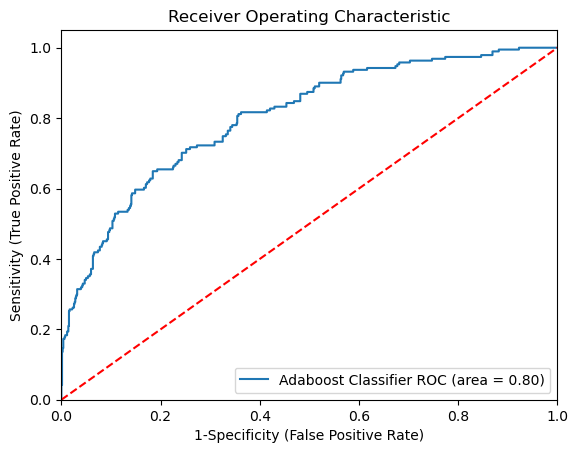

In [66]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
    {
        'label': 'Adaboost Classifier',
        'model': AdaBoostClassifier(n_estimators=80,
                                  algorithm='SAMME'),
        'auc': 0.6049  # AUC will be computed dynamically
    }
]

# Create loop through all models
for algo in auc_models:
    model = algo['model']  # Select the model
    model.fit(X_train, y_train)  # Train the model
    
    # Compute predicted probabilities for the positive class
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    # Compute False Positive Rate, True Positive Rate, and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc_score = roc_auc_score(y_test, y_pred_prob)
    
    # Plot ROC curve and display AUC score
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], auc_score))  # Correctly reference auc_score

# Custom settings for the plot
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal reference line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Save and display the plot
plt.savefig("auc.png")
plt.show()
